# Read Data Sample

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import model_selection as ms
pd.set_option("display.max_rows",15)
%matplotlib inline

In [2]:
#no_of_lines = !wc -l dataset/combine_result_20150304_new0921.csv
#['32998329 dataset/combine_result_20150304_new0921.csv']

In [3]:
#!wc -l dataset/combine_result_20150604_new0921.csv
#['31736830 dataset/combine_result_20150304_new0921.csv']

In [4]:
! head dataset/combine_result_20150304_new0921.csv

sIP,dIP,sPort,dPort,pro,packets,bytes,flags,sTime,durat,eTime,sen,in,out,nhIP,cla,type,iTy,iCo,initialF,sessionF,attribut,appli,Records,%Records,cumul_%,status,taxonomy,label,heuristic,distance,nbDetectors
47.24.55.119,214.59.69.106,80,21679,6,1,1500,A,2015/03/04T05:00:24,0,2015/03/04T05:00:24,?,0,0,0.0.0.0,all,in,,,,,,0,18064,0.020778,0.020778,anomaly,mptmp,Multi Points,0.59898,6,anomalous
200.126.62.160,147.178.193.185,55455,80,6,1,52,A,2015/03/04T05:10:25,0,2015/03/04T05:10:25,?,0,0,0.0.0.0,all,in,,,,,,0,15510,0.017840,0.038618,anomaly,mptpHTTP,Multi Points,0.75724,11,anomalous
47.24.55.119,214.59.69.106,80,21816,6,1,1500,A,2015/03/04T05:06:05,0,2015/03/04T05:06:05,?,0,0,0.0.0.0,all,in,,,,,,0,13980,0.016080,0.054698,anomaly,mptmp,Multi Points,0.59898,6,anomalous
5.48.95.89,164.219.8.3,443,55233,6,1,1426,A,2015/03/04T05:06:44,0,2015/03/04T05:06:44,?,0,0,0.0.0.0,all,in,,,,,,0,12387,0.014248,0.068946,anomaly,mptmp,Multi Points,0.59898,6,anomalous
113.197.143.171,215.67.133.83,0,0,1,1,3

In [5]:
! tail dataset/combine_result_20150304_new0921.csv

0.0.0.0,215.67.133.83,0,768,1,1,56,,2015/03/04T05:00:42,0,2015/03/04T05:00:42,?,0,0,0.0.0.0,all,in,3,0,,,,0,1,0.000001,99.999990,anomaly,netout,HTTP,0.04509,1,anomalous
223.255.255.113,215.67.133.83,0,2816,1,1,56,,2015/03/04T05:14:39,0,2015/03/04T05:14:39,?,0,0,0.0.0.0,all,in,11,0,,,,0,1,0.000001,99.999991,normal
223.255.255.125,215.67.133.83,0,2816,1,1,56,,2015/03/04T05:09:48,0,2015/03/04T05:09:48,?,0,0,0.0.0.0,all,in,11,0,,,,0,1,0.000001,99.999992,normal
223.255.255.127,215.67.133.83,0,2816,1,1,56,,2015/03/04T05:09:45,0,2015/03/04T05:09:45,?,0,0,0.0.0.0,all,in,11,0,,,,0,1,0.000001,99.999993,normal
223.255.255.142,215.67.133.83,0,0,1,1,32,,2015/03/04T05:00:01,0,2015/03/04T05:00:01,?,0,0,0.0.0.0,all,in,0,0,,,,0,1,0.000001,99.999994,normal
223.255.255.214,215.67.133.83,0,0,1,1,32,,2015/03/04T05:11:04,0,2015/03/04T05:11:04,?,0,0,0.0.0.0,all,in,0,0,,,,0,1,0.000001,99.999995,normal
244.190.107.157,138.32.174.245,0,0,6,1,60,S    E,2015/03/04T05:03:41,0,2015/03/04T05:03:41,?,0,0,0.0.0.0,all,

In [6]:
no_of_lines = 32998329 #train
train_size = int(no_of_lines * 0.01)
no_of_lines = 31736830 #test
test_size = int(no_of_lines * 0.1) 
print(train_size, test_size)

329983 3173683


In [7]:
class dataset:
    col_names = ['sIP','dIP','sPort','dPort','pro','packets','bytes','flags','sTime','durat','eTime','sen','in','out','nhIP',
                 'cla','type','iTy','iCo','initialF','sessionF','attribut','appli','Records','Records','cumul','status',
                 'taxonomy','label','heuristic','distance','nbDetectors'
                ]

    #sample_data = pd.read_csv("dataset/combine_result_20150304_new0921.csv", header = 0,names = col_names, nrows = train_size)
    #sample_data.to_pickle('dataset/sample_train.pkl')
    #sample_data = pd.read_csv("dataset/combine_result_20150604_new0921.csv", header = 0,names = col_names, nrows = test_size)
    #sample_data.to_pickle('dataset/sample_test.pkl')
    
    

In [21]:
def process(df):
    min_port = np.minimum(df.sPort.values, df.dPort.values)
    df.insert(0,'svc_port',0)
    df.loc[min_port <= 1024, 'svc_port'] = min_port 
    df.loc[min_port > 1024, 'svc_port'] = df.dPort.copy()
    df = df.loc[:,('pro', 'packets', 'bytes', 'flags', 'durat', 'svc_port', 'status')].copy()
    return df
dataset.kdd_train = process(pd.read_pickle('dataset/sample_train.pkl'))
dataset.kdd_test = process(pd.read_pickle('dataset/sample_test.pkl'))
dataset.kdd_label = dataset.kdd_train.status.copy()

dataset.kdd_train

,pro,packets,bytes,flags,durat,svc_port,status
0,6,1,1500,A,0,80,anomaly
1,6,1,52,A,0,80,anomaly
2,6,1,1500,A,0,80,anomaly
3,6,1,1426,A,0,443,anomaly
4,1,1,32,NaN,0,0,normal
5,1,1,32,NaN,0,0,normal
6,1,1,32,NaN,0,0,normal
...,...,...,...,...,...,...,...
329976,6,1,362,PA,0,80,anomaly
329977,6,1,1500,PA,0,80,anomaly


In [11]:
dataset.kdd_label.unique()

array(['anomaly', 'normal'], dtype=object)

In [12]:
dataset.kdd_train.info(memory_usage = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329983 entries, 0 to 329982
Data columns (total 7 columns):
pro         329983 non-null int64
packets     329983 non-null int64
bytes       329983 non-null int64
flags       310521 non-null object
durat       329983 non-null int64
svc_port    329983 non-null int64
status      329983 non-null object
dtypes: int64(5), object(2)
memory usage: 17.6+ MB


In [26]:
dataset.kdd_train.describe()

,pro,packets,bytes,durat,svc_port
count,329983.000000,329983.0,329983.000000,329983.0,329983.000000
mean,7.344548,1.0,495.593561,0.0,3402.446532
std,6.792850,0.0,651.264860,0.0,12088.844138
min,1.000000,1.0,28.000000,0.0,0.000000
25%,6.000000,1.0,40.000000,0.0,80.000000
50%,6.000000,1.0,52.000000,0.0,80.000000
75%,6.000000,1.0,1426.000000,0.0,443.000000
max,51.000000,1.0,1500.000000,0.0,65534.000000


In [28]:
category_variables = ["flags", "status"]

for cv in category_variables:
    dataset.kdd_train[cv] = dataset.kdd_train[cv].astype("category")
    dataset.kdd_test[cv] = dataset.kdd_test[cv].astype("category", categories = dataset.kdd_train[cv].cat.categories)
    
    #print("Length of Categories for {} are {}".format(cv , len(dataset.kdd_train[cv].cat.categories)))
    #print("Categories for {} are {} \n".format(cv ,dataset.kdd_train[cv].cat.categories))

    

TypeError: _astype() got an unexpected keyword argument 'categories'

In [29]:
dummy_variables_2labels = category_variables
    
class preprocessing:
    kdd_train_2labels = pd.get_dummies(dataset.kdd_train, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)
    kdd_test_2labels = pd.get_dummies(dataset.kdd_test, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)
    
    

In [30]:
preprocessing.kdd_train_2labels.to_pickle("dataset/preprocessed_train_data.pkl")
preprocessing.kdd_test_2labels.to_pickle("dataset/preprocessed_test_data.pkl")

preprocessing.kdd_train_2labels

,pro,packets,bytes,durat,svc_port,flags_A,flags_F A,flags_PA,flags_R,flags_R A,status_anomaly,status_normal
0,6,1,1500,0,80,1,0,0,0,0,1,0
1,6,1,52,0,80,1,0,0,0,0,1,0
2,6,1,1500,0,80,1,0,0,0,0,1,0
3,6,1,1426,0,443,1,0,0,0,0,1,0
4,1,1,32,0,0,0,0,0,0,0,0,1
5,1,1,32,0,0,0,0,0,0,0,0,1
6,1,1,32,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
329976,6,1,362,0,80,0,0,1,0,0,1,0
329977,6,1,1500,0,80,0,0,1,0,0,1,0


In [31]:
dataset.kdd_label.value_counts()


anomaly    284631
normal      45352
Name: status, dtype: int64

In [32]:
import matplotlib
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing as ps
from pandas.plotting import radviz
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [33]:
df_train = preprocessing.kdd_train_2labels.drop(['status_anomaly', 'status_normal'], axis = 1)
df_train = pd.concat([df_train, dataset.kdd_label], axis = 1)
df_train

,pro,packets,bytes,durat,svc_port,flags_A,flags_F A,flags_PA,flags_R,flags_R A,status
0,6,1,1500,0,80,1,0,0,0,0,anomaly
1,6,1,52,0,80,1,0,0,0,0,anomaly
2,6,1,1500,0,80,1,0,0,0,0,anomaly
3,6,1,1426,0,443,1,0,0,0,0,anomaly
4,1,1,32,0,0,0,0,0,0,0,normal
5,1,1,32,0,0,0,0,0,0,0,normal
6,1,1,32,0,0,0,0,0,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...
329976,6,1,362,0,80,0,0,1,0,0,anomaly
329977,6,1,1500,0,80,0,0,1,0,0,anomaly


In [34]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
df_n = df_train[df_train.status == 'normal'].sample(1000)
df_a = df_train[df_train.status == 'anomaly'].sample(1000)

In [35]:
sample = pd.concat([df_n, df_a], axis=0)
sample.to_pickle("dataset/tsne_sample.pkl")

In [36]:
sample = pd.read_pickle("dataset/tsne_sample.pkl")

In [37]:
sample.shape

(2000, 11)

In [38]:
sample.groupby(by='status').status.count()

status
anomaly    1000
normal     1000
Name: status, dtype: int64

In [39]:
x_tsne = sample.iloc[:, :-1]
y_tsne = sample.iloc[:, -1]


from sklearn.decomposition import SparsePCA
pca_analysis = SparsePCA(n_components=5)
x_tsne_pca = pca_analysis.fit_transform(x_tsne)
#x_tsne_pca = x_tsne

In [40]:



pd.DataFrame(x_tsne_pca).to_pickle("dataset/tsne_pca_df.pkl")

x_tsne_pca = pd.read_pickle("dataset/tsne_pca_df.pkl").values

In [41]:
x_tsne_pca_df = pd.DataFrame(x_tsne_pca)

x_tsne_pca_df['is'] = y_tsne.values

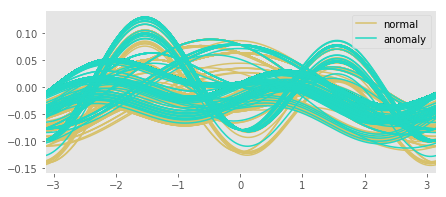

In [42]:
plt.figure(figsize=(7,3))

andrews_curves(x_tsne_pca_df, "is")

In [43]:
df = model.fit_transform(x_tsne_pca) 
df1 = model.fit_transform(df)
df2 = model.fit_transform(df1) 
df3 = model.fit_transform(df2) 

In [44]:
pd.DataFrame(df).to_pickle("dataset/tsne_df.pkl")
pd.DataFrame(df1).to_pickle("dataset/tsne_df1.pkl")
pd.DataFrame(df2).to_pickle("dataset/tsne_df2.pkl")
pd.DataFrame(df3).to_pickle("dataset/tsne_df3.pkl")

In [45]:

df = pd.read_pickle("dataset/tsne_df.pkl").values
df1 = pd.read_pickle("dataset/tsne_df1.pkl").values
df2 = pd.read_pickle("dataset/tsne_df2.pkl").values
df3 = pd.read_pickle("dataset/tsne_df3.pkl").values

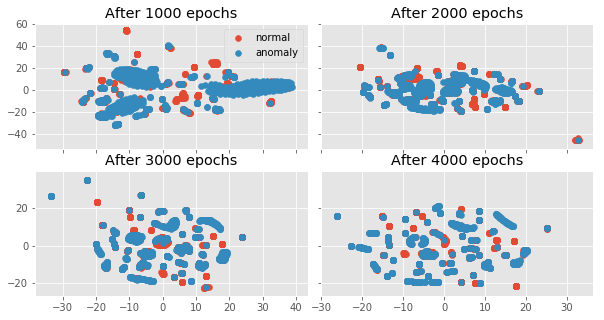

In [46]:

#plt.figure(figsize=(15,8))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,5))

ax1.scatter(x = df[y_tsne=='normal',0], y = df[y_tsne=='normal',1], label = 'normal')
ax1.scatter(x = df[y_tsne=='anomaly',0], y = df[y_tsne=='anomaly',1], label = 'anomaly')
ax1.title.set_text("After 1000 epochs")

ax2.scatter(x = df1[y_tsne=='normal',0], y = df1[y_tsne=='normal',1], label = 'normal')
ax2.scatter(x = df1[y_tsne=='anomaly',0], y = df1[y_tsne=='anomaly',1], label = 'anomaly')
ax2.title.set_text("After 2000 epochs")

ax3.scatter(x = df2[y_tsne=='normal',0], y = df2[y_tsne=='normal',1], label = 'normal')
ax3.scatter(x = df2[y_tsne=='anomaly',0], y = df2[y_tsne=='anomaly',1], label = 'anomaly')
ax3.title.set_text("After 3000 epochs")

ax4.scatter(x = df3[y_tsne=='normal',0], y = df3[y_tsne=='normal',1], label = 'normal')
ax4.scatter(x = df3[y_tsne=='anomaly',0], y = df3[y_tsne=='anomaly',1], label = 'anomaly')
ax4.title.set_text("After 4000 epochs")

plt.subplots_adjust(wspace=0.05, hspace=0.18)
ax1.legend(loc=0)




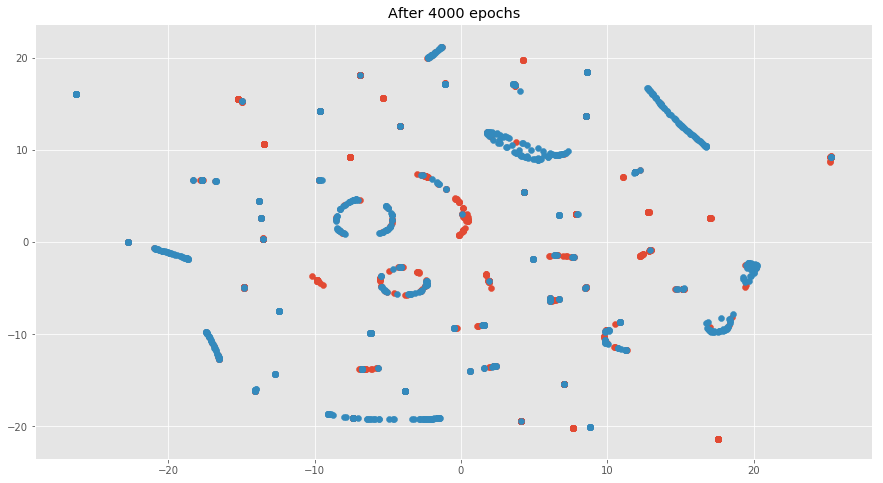

In [47]:

plt.figure(figsize=(15,8))


plt.scatter(x = df3[y_tsne=='normal',0], y = df3[y_tsne=='normal',1], label = 'normal')
plt.scatter(x = df3[y_tsne=='anomaly',0], y = df3[y_tsne=='anomaly',1], label = 'anomaly')
plt.title("After 4000 epochs")


In [48]:
preprocessing.kdd_train_2labels.to_pickle("dataset/kdd_train_2labels.pkl")
dataset.kdd_label.to_pickle("dataset/kdd_label.pkl")


In [49]:
import statsmodels.api as sm

x_ols = sample.iloc[:, :-1]
y_ols = sample.iloc[:, -1].map(lambda x: {"normal":0, "anomaly":1}[x])

results = sm.OLS(y_ols, x_ols.values).fit()

/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [50]:
results

In [51]:
results.pvalues.sort_values()

/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


x4       2.295176e-71
x5       4.999732e-25
x3       1.164028e-14
x7       8.083688e-08
const    8.211880e-06
x8       1.213488e-02
x6       4.011569e-01
x1       7.950154e-01
x2       7.993650e-01
x9                NaN
dtype: float64

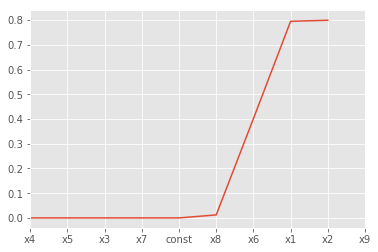

In [52]:
import warnings
warnings.filterwarnings('ignore')
results.pvalues.sort_values().plot();

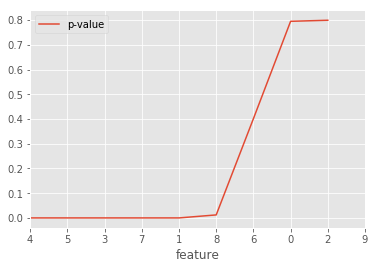

In [53]:
temp = results.pvalues
temp = temp.reset_index()
#temp.set_index( [i for i in range(len(results.pvalues.index))])
#temp[0].plot()
t = temp[0].reset_index()
t = t.sort_values(by=0)
t.columns = ['feature', 'p-value']
t.feature = t.feature.astype('category')
t.set_index('feature').plot()

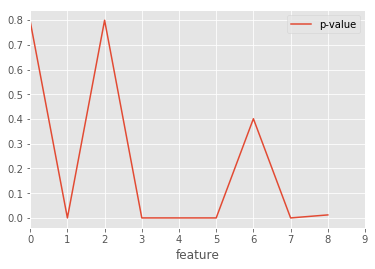

In [54]:
temp = results.pvalues
temp = temp.reset_index()
#temp.set_index( [i for i in range(len(results.pvalues.index))])
#temp[0].plot()
t = temp[0].reset_index()
t.columns = ['feature', 'p-value']
t.feature = t.feature.astype('category')
t.set_index('feature').plot()

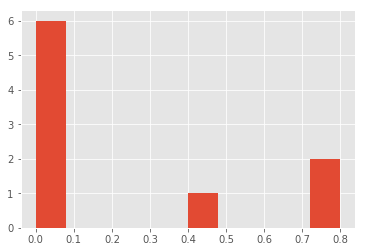

In [55]:
results.pvalues.sort_values().hist()

In [56]:

print("Variables having P value lower than 1e-5")
results.pvalues[results.pvalues < 1e-5].sort_values()

Variables having P value lower than 1e-5


x4       2.295176e-71
x5       4.999732e-25
x3       1.164028e-14
x7       8.083688e-08
const    8.211880e-06
dtype: float64